$$v_r(t) = K_\ast \left[ e \cos \omega + \cos(\theta + \omega)\right]$$

In [2]:
# Imports, Definition of parameters and Auxiliary functions
import numpy as np
import matplotlib.pyplot as plt

K = 75.0 # in m/s
P = 425952.0  # 4.93 days in seconds
t_p = 0.0 # Perihelion passing time. Set as origin here.

def meananomaly(t):
    return((2 * np.pi/P) * (t - t_p))

def f(m, E, e):
    return(m - E + e * np.sin(E))

def fprime(E, e):
    return(-1 + e * np.cos(E))

# Newton-Raphson Method
def NR(t, e, guess, steps, epsilon):
    step_count = 0
    m = meananomaly(t)
    while f(m, guess, e) > epsilon and step_count <= steps:
        guess = guess - np.divide(f(m, guess, e), fprime(guess, e))
        step_count += 1
    return guess

def eccentricanomaly(e, t):
    value = NR(t, e, 0.0, 100, 1e-6)
    return value

def trueanomaly(E, e):
    E = np.mod(E, 2 * np.pi)
    if(E >= 0 and E <= np.pi):
        ret = np.arccos( np.divide( np.cos(E) - e, 1 - e * np.cos(E) ) )
    elif(E > np.pi and E <= 2 * np.pi):
        ret = 2 * np.pi - np.arccos( np.divide( np.cos(E) - e, 1 - e * np.cos(E) ) )
    return ret

def velocity(e, omega, theta):
    value = K * (e * np.cos(omega) + np.cos(theta + omega))
    return value

In [3]:
# Main functions and parameters
e = np.array([0.0, 0.8])
omega = np.radians(np.arange(0, 360, 45))
t = np.linspace(0, 2*P, 500)
velocities = np.zeros((np.size(t), np.size(e), np.size(omega)))

for i in range(np.size(t)):
    for j in range(np.size(e)):
        for k in range(np.size(omega)):
            E = eccentricanomaly(e[j], t[i])
            theta = trueanomaly(E, e[j])
            temp = velocity(e[j], omega[k], theta)
            velocities[i][j][k] = temp

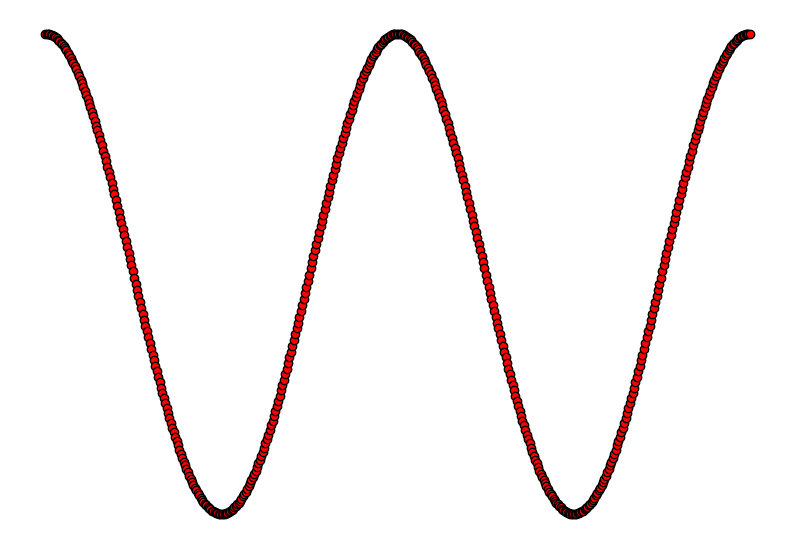

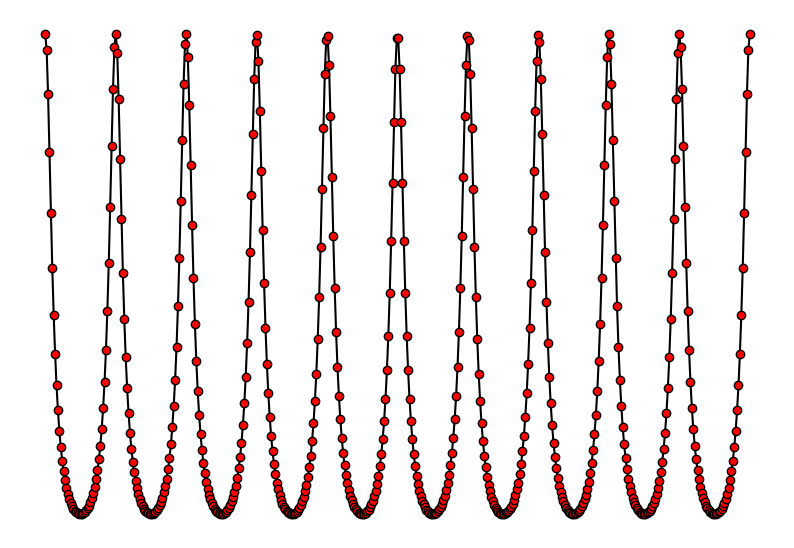

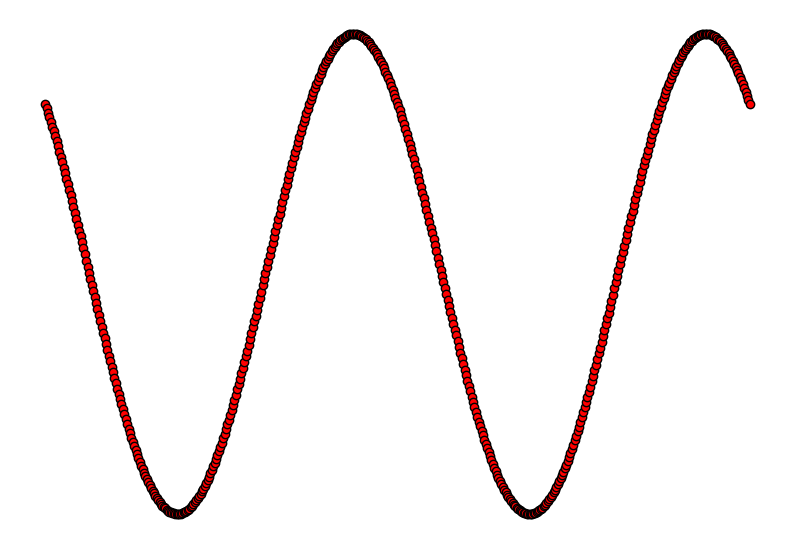

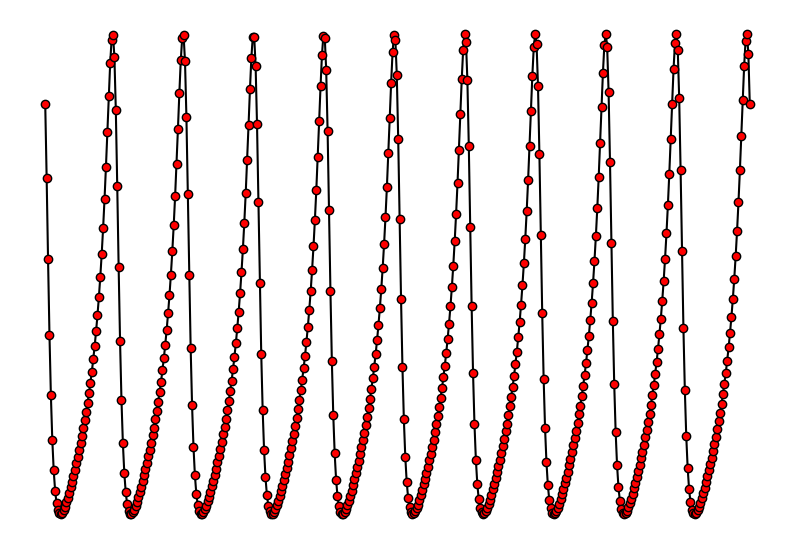

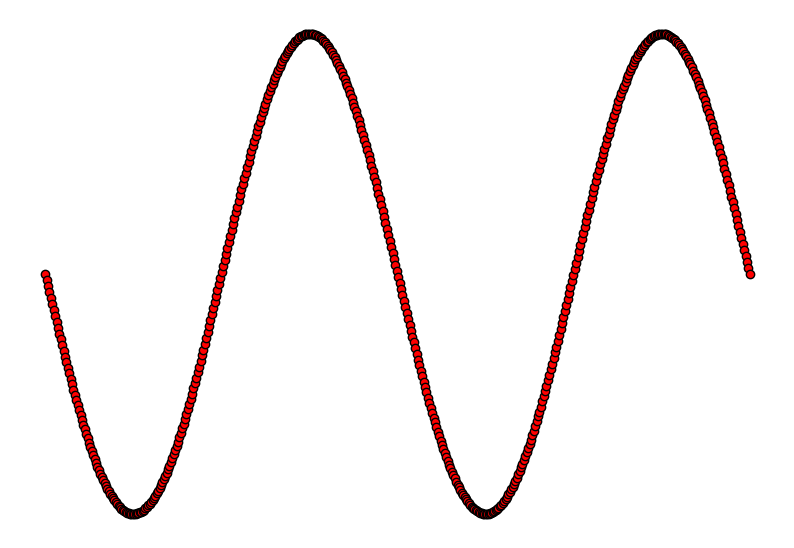

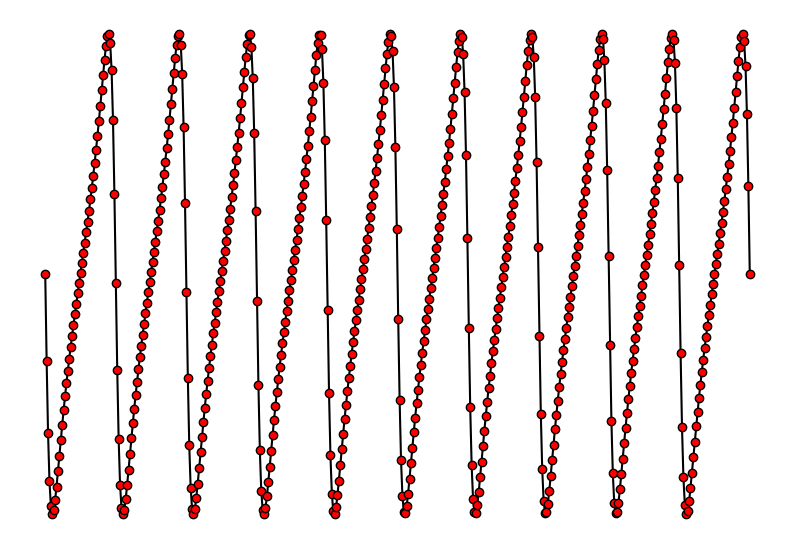

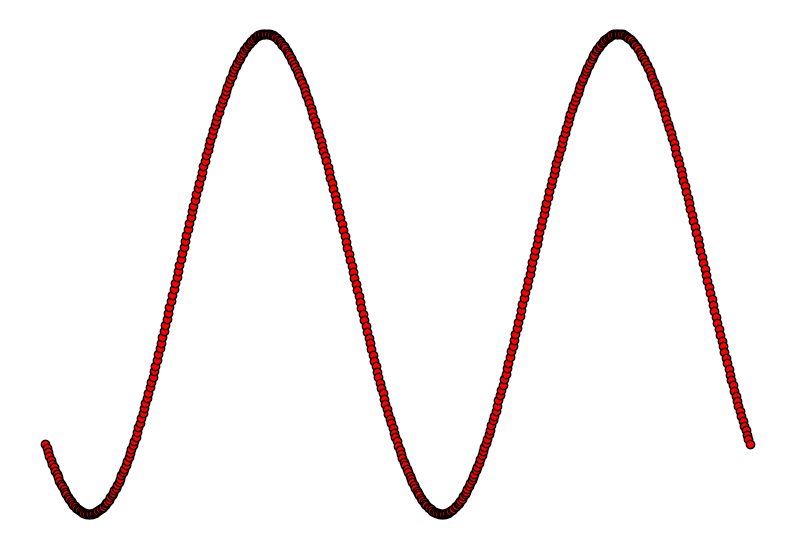

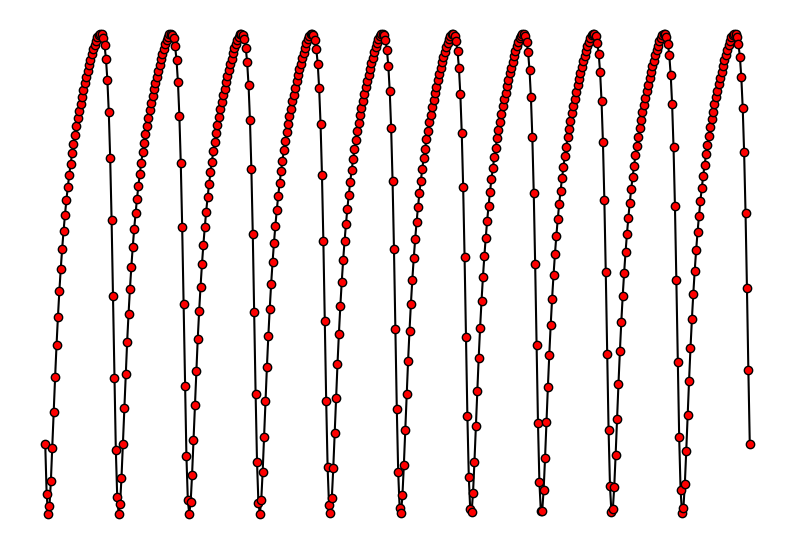

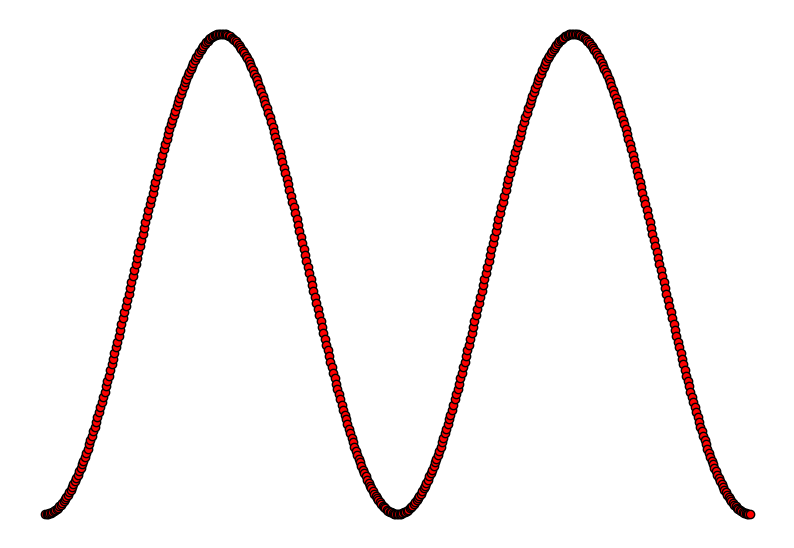

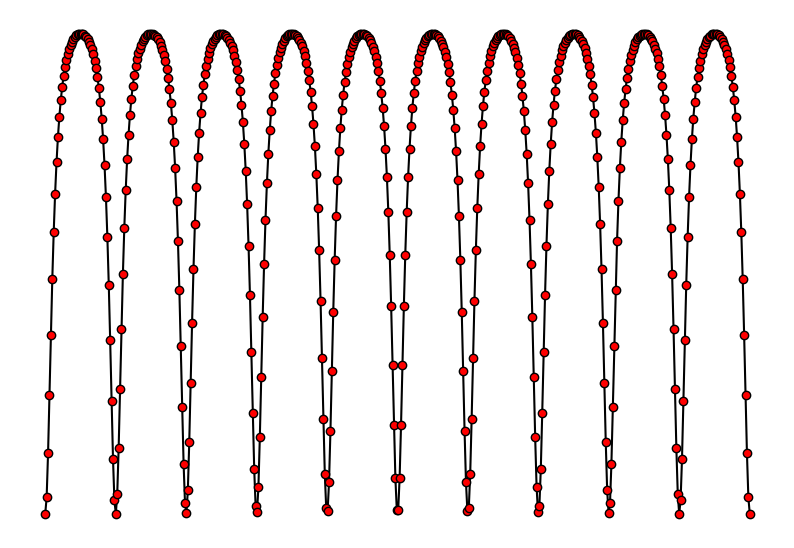

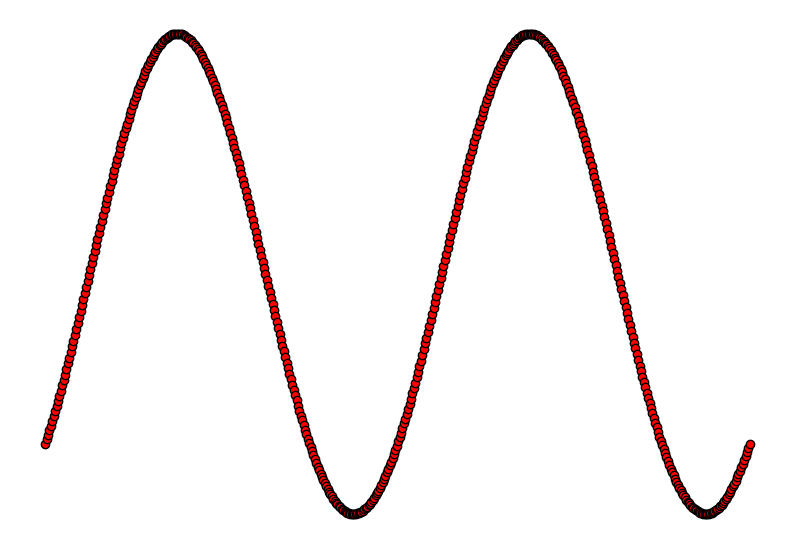

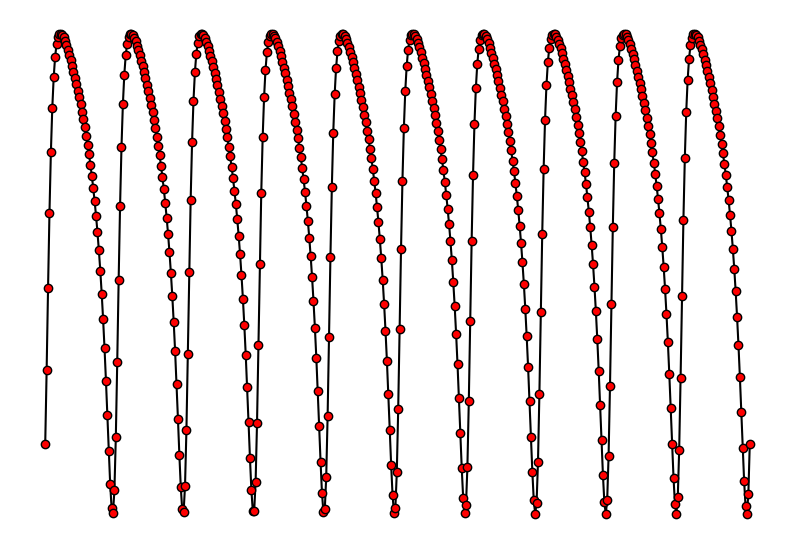

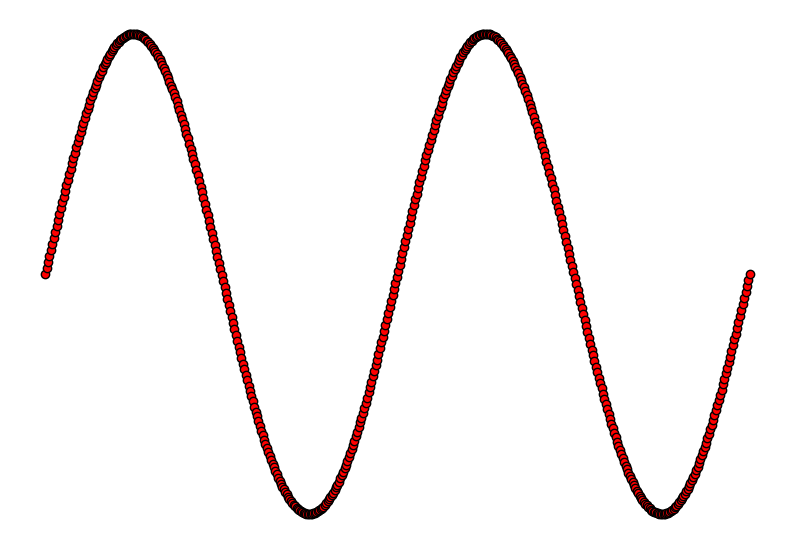

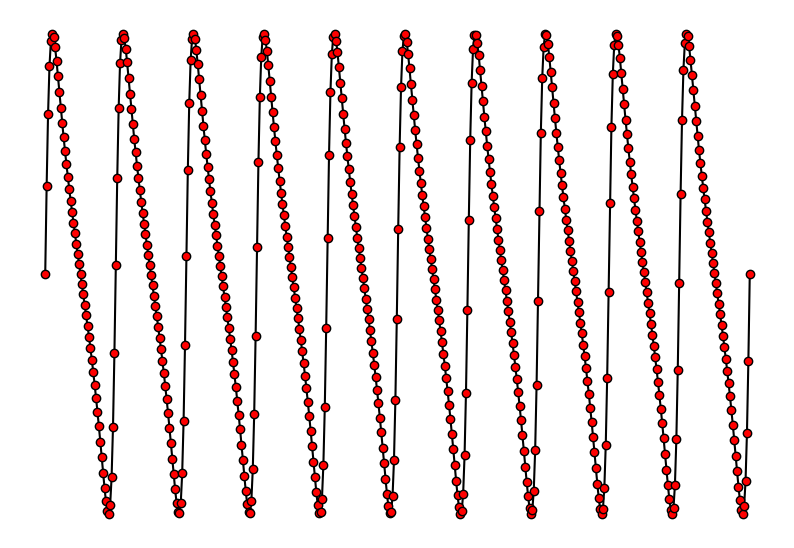

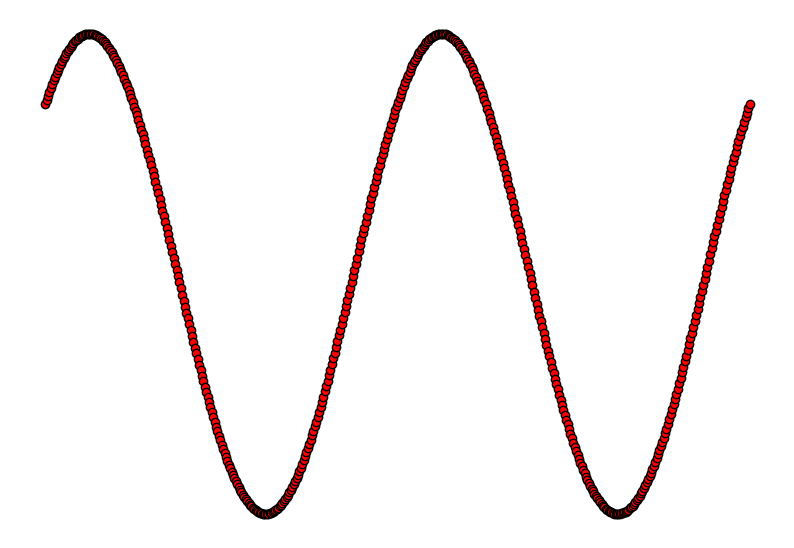

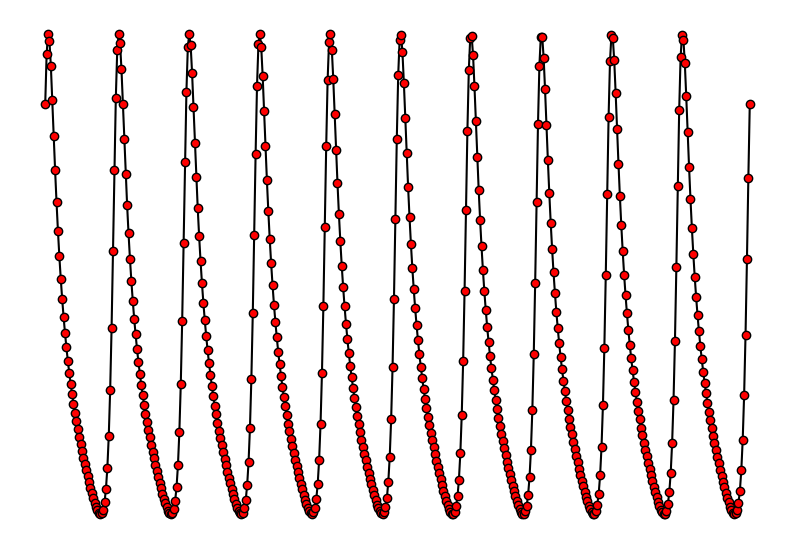

In [6]:
k = 1
for i in range(np.size(omega)):
    for j in range(np.size(e)):
        fig = plt.figure()
        fig.set_size_inches(10, 7)
        fig.set_dpi(100)
        plt.plot(t/P, velocities[:, j, i], 'ok-', mfc='r')
        plt.grid(True)
        plt.xlabel("Time (in units of P)")
        plt.ylabel("Velocity (in m/s)")
        plt.title("e = " + str(e[j]) + ", $\omega$ ="  + str(omega[i]))
        plt.savefig("plot" + str(k) + ".png")
        k += 1